In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display,HTML
display(HTML("<style>.container  {width:100% !important;}</style>"))

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import finpy_tse as fpy
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.linalg import cholesky
import os
#from pptx import Presentation

In [4]:
plt.style.use('seaborn-white')
plt.rc('figure',autolayout=True,figsize=(20,8))
plt.rc('axes',labelweight='bold',labelsize='large',titleweight='bold',titlesize=20,titlepad=10)
plot_params = dict(color="0.75",style=".-",markeredgecolor="0.25",markerfacecolor="0.25")
%config InlineBackend.figure_format = 'retina'
plt.rc('ytick',labelsize=20)
plt.rc('xtick',labelsize=20)

In [5]:
PROJECT_ROOT_DIR = "D:\Optics_Slope"
CHAPTER_ID = "Output"
FILES_PATH = os.path.join(PROJECT_ROOT_DIR, "Excels_File_Periods", CHAPTER_ID)
os.makedirs(FILES_PATH, exist_ok=True)

def generate_unique_filename(directory, base_filename):
    counter = 1
    while True:
        filename = f"{base_filename}_{counter}.xlsx"
        file_path = os.path.join(directory, filename)
        if not os.path.exists(file_path):
            return filename
        counter += 1

def save_data(data_frame, base_filename):
    unique_filename = generate_unique_filename(FILES_PATH, base_filename)
    excel_path = os.path.join(FILES_PATH, unique_filename)
    data_frame.to_excel(excel_path, index=True)
    print(f"Saving Excel file: {excel_path}")

In [6]:
PROJECT_ROOT_DIR = "D:\Optics_total"
CHAPTER_ID = "total_data"
FILES_PATH1 = os.path.join(PROJECT_ROOT_DIR, "Excels_File_Periods", CHAPTER_ID)
os.makedirs(FILES_PATH1, exist_ok=True)

def generate_unique_filename_1(directory, base_filename):
    counter = 1
    while True:
        filename = f"{base_filename}_{counter}.xlsx"
        file_path = os.path.join(directory, filename)
        if not os.path.exists(file_path):
            return filename
        counter += 1

def save_data_1(data_frame, base_filename):
    unique_filename = generate_unique_filename(FILES_PATH1, base_filename)
    excel_path = os.path.join(FILES_PATH1, unique_filename)
    data_frame.to_excel(excel_path, index=True)
    print(f"Saving Excel file: {excel_path}")

In [7]:
start_date = '1401-12-29'
end_date = '1403-12-29'

In [8]:
import os
PROJECT_ROOT_DIR = "D:\Optics_Slope"
CHAPTER_ID = "Output"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Plot_Periods", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    print(path)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [9]:
#ljkjfglaksdjl; kjdfg

In [10]:
def fetch_stock_data(tickers, data_type):
    stock_data = {}
    for symbol in tickers:
        try:
            data = fpy.Get_Price_History(symbol,start_date=start_date,end_date=end_date,
                    ignore_date=False,adjust_price=True,show_weekday=False,double_date=False)
            #data.index.values = pd.to_datetime(data.index.values)
            #stock_data[symbol] = data[data_type]
            if data_type == 'Close':
                stock_data[symbol] = data['Close']
            elif data_type == 'Volume':
                stock_data[symbol] = data['Volume']
            elif data_type == 'Adj Close':
                stock_data[symbol] = data['Adj Close']
            elif data_type == 'Final':
                stock_data[symbol] = data['Final']
            else:
                print(f"Invalid data type: {data_type}. Please specify 'close_price' or 'volume'.")
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
            pass
    return stock_data

In [11]:
import time
def retry_get_market_watch(save_excel=True,save_path=FILES_PATH,retries=3,delay=10):
    attempts = 0
    while attempts < retries:
        try:
            ticks = fpy.Get_MarketWatch(save_excel=True,save_path=FILES_PATH)
            return ticks
        except Exception as e:
            error_message = str(e)
            if "Error fetching data" in error_message:
                print(f"Error fetching Market data: {error_message}. Retrying in {delay} seconds...")
                time.sleep(delay)
                attempts += 1
            else:
                print(f"An unexpected error occurred: {error_message}")
                return None
ticks = retry_get_market_watch(save_excel=True,save_path=FILES_PATH)
if ticks is not None:
    # Your further processing code here
    pass
else:
    print("Failed to fetch Market Wathch. Please check your internet connection and try again.")

In [12]:
import os
import pandas as pd
from datetime import datetime

# Directory containing Excel files
directory = FILES_PATH

# Specify the part of the filename you want to search for
#file_part = input("Enter the part of the filename you want to search for: ")
file_part = 'Order'
# Search for files containing the specified part in their names
matching_files = [file for file in os.listdir(directory) if file_part in file]

# Dictionary to store modification times of matching Excel files
modification_times = {}

# Get modification times for each matching file
for file_name in matching_files:
    file_path = os.path.join(directory, file_name)
    if os.path.exists(file_path):
        modification_time = datetime.fromtimestamp(os.path.getmtime(file_path))
        modification_times[file_name] = modification_time

# Find the most recently modified file
if modification_times:
    last_file = max(modification_times, key=modification_times.get)
    last_file_path = os.path.join(directory, last_file)
    
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(last_file_path)
    
    # Display the DataFrame
    print("DataFrame from the last saved file:")
    print(df)
    
    # Print the last modification time of the file
    print(f"Last modified time of the file '{last_file}': {modification_times[last_file]}")
else:
    print("No matching Excel files found in the directory.")


DataFrame from the last saved file:
      Ticker   Day_LL   Day_UL  OB-Depth  Sell-No  Sell-Vol  Sell-Price  \
0      آ س پ  26100.0  30000.0         1        3     15050       27150   
1        NaN      NaN      NaN         2        4     34648       27200   
2        NaN      NaN      NaN         3        1     48693       27250   
3        NaN      NaN      NaN         4        2     13972       27300   
4        NaN      NaN      NaN         5        1       356       27450   
...      ...      ...      ...       ...      ...       ...         ...   
4380     NaN      NaN      NaN         3        2   1010000       22617   
4381     NaN      NaN      NaN         4        1   1000000       22618   
4382     NaN      NaN      NaN         5        2   1013550       22619   
4383  یاقوت2      1.0      1.0         1        0         0           0   
4384  یاقوت4  22200.0  23302.0         1        0         0           0   

      Buy-Price  Buy-Vol  Buy-No             Download  
0      

In [13]:
import os
import pandas as pd
from datetime import datetime

# Directory containing Excel files
directory = FILES_PATH

# Specify the part of the filename you want to search for
#file_part = input("Enter the part of the filename you want to search for: ")
file_part = 'Market'
# Search for files containing the specified part in their names
matching_files = [file for file in os.listdir(directory) if file_part in file]

# Dictionary to store modification times of matching Excel files
modification_times = {}

# Get modification times for each matching file
for file_name in matching_files:
    file_path = os.path.join(directory, file_name)
    if os.path.exists(file_path):
        modification_time = datetime.fromtimestamp(os.path.getmtime(file_path))
        modification_times[file_name] = modification_time

# Find the most recently modified file
if modification_times:
    last_file = max(modification_times, key=modification_times.get)
    last_file_path = os.path.join(directory, last_file)
    
    # Read the Excel file into a pandas DataFrame
    df1 = pd.read_excel(last_file_path)
    
    # Display the DataFrame
    print("DataFrame from the last saved file:")
    print(df1)
    
    # Print the last modification time of the file
    print(f"Last modified time of the file '{last_file}': {modification_times[last_file]}")
else:
    print("No matching Excel files found in the directory.")

DataFrame from the last saved file:
     Ticker Trade Type      Time   Open   High    Low  Close  Final  Close(%)  \
0     غمینو      تابلو  12:29:03   5310   5310   5030   5030   5070     -6.85   
1    وسالت2      بلوکی  12:27:43   6650   6650   6650   6650   6650      0.00   
2      وتوس      تابلو  12:29:59  16000  16580  15490  15490  15660     -6.97   
3     ددانا      تابلو  12:29:22  44150  45000  43500  43700  44800     -2.89   
4     ماهور      تابلو  15:19:57  11036  11037  11036  11036  11036      0.14   
..      ...        ...       ...    ...    ...    ...    ...    ...       ...   
937   دامون      تابلو  14:56:57  10346  10347  10346  10346  10346      0.18   
938   فنورد      تابلو  12:28:55  12700  12890  12200  12450  12530     -1.89   
939   غفارس      تابلو  12:28:32   8720   8800   8540   8540   8600     -4.90   
940  بکهنوج      تابلو  12:30:00   1177   1253   1165   1253   1236      4.94   
941   کزغال      تابلو  12:27:29  23050  23150  21800  22050  22300     -

In [14]:
df1

,Ticker,Trade Type,Time,Open,High,Low,Close,Final,Close(%),Final(%),...,No_Sell_R,No_Sell_I,Name,Market,Sector,Share-No,Base-Vol,Market Cap,EPS,Download
0,غمینو,تابلو,12:29:03,5310,5310,5030,5030,5070,-6.85,-6.11,...,81.0,0.0,شرکت صنایع غذایی مینو شرق,فرابورس,محصولات غذایی و آشامیدنی به جز قند و شکر,2700000000,2777778,13689000000000,838.0,1403-01-18 15:48:08
1,وسالت2,بلوکی,12:27:43,6650,6650,6650,6650,6650,0.00,0.00,...,13.0,0.0,بانک قرض الحسنه رسالت,پایه,بانکها و موسسات اعتباری,12000000000,1,79800000000000,1841.0,1403-01-18 15:48:08
2,وتوس,تابلو,12:29:59,16000,16580,15490,15490,15660,-6.97,-5.95,...,85.0,1.0,توسعه شهری توس گستر,بورس,انبوه سازی، املاک و مستغلات,2000000000,900901,31320000000000,797.0,1403-01-18 15:48:08
3,ددانا,تابلو,12:29:22,44150,45000,43500,43700,44800,-2.89,-0.44,...,192.0,0.0,داروسازی دانا,فرابورس,مواد و محصولات دارویی,2400000000,960000,107520000000000,6273.0,1403-01-18 15:48:08
4,ماهور,تابلو,15:19:57,11036,11037,11036,11036,11036,0.14,0.14,...,135.0,7.0,صندوق سرمایه گذاری ماهور-ثابت,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,1000000000,1,11036000000000,NaN,1403-01-18 15:48:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,دامون,تابلو,14:56:57,10346,10347,10346,10346,10346,0.18,0.18,...,92.0,7.0,ص.س. درآمد ثابت آسمان دامون-د,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,1000000000,1,10346000000000,NaN,1403-01-18 15:48:08
938,فنورد,تابلو,12:28:55,12700,12890,12200,12450,12530,-1.89,-1.26,...,130.0,1.0,نوردوقطعات فولادی,بورس,فلزات اساسی,3168000000,1267200,39695040000000,1970.0,1403-01-18 15:48:08
939,غفارس,تابلو,12:28:32,8720,8800,8540,8540,8600,-4.90,-4.23,...,38.0,0.0,شیر پاستوریزه پگاه فارس,فرابورس,محصولات غذایی و آشامیدنی به جز قند و شکر,1704275773,1,14656771647800,807.0,1403-01-18 15:48:08
940,بکهنوج,تابلو,12:30:00,1177,1253,1165,1253,1236,4.94,3.52,...,271.0,0.0,تولید برق ماهتاب کهنوج,فرابورس,عرضه برق، گاز، بخاروآب گرم,16050495533,1,19838412478788,-547.0,1403-01-18 15:48:08


In [15]:
df1

,Ticker,Trade Type,Time,Open,High,Low,Close,Final,Close(%),Final(%),...,No_Sell_R,No_Sell_I,Name,Market,Sector,Share-No,Base-Vol,Market Cap,EPS,Download
0,غمینو,تابلو,12:29:03,5310,5310,5030,5030,5070,-6.85,-6.11,...,81.0,0.0,شرکت صنایع غذایی مینو شرق,فرابورس,محصولات غذایی و آشامیدنی به جز قند و شکر,2700000000,2777778,13689000000000,838.0,1403-01-18 15:48:08
1,وسالت2,بلوکی,12:27:43,6650,6650,6650,6650,6650,0.00,0.00,...,13.0,0.0,بانک قرض الحسنه رسالت,پایه,بانکها و موسسات اعتباری,12000000000,1,79800000000000,1841.0,1403-01-18 15:48:08
2,وتوس,تابلو,12:29:59,16000,16580,15490,15490,15660,-6.97,-5.95,...,85.0,1.0,توسعه شهری توس گستر,بورس,انبوه سازی، املاک و مستغلات,2000000000,900901,31320000000000,797.0,1403-01-18 15:48:08
3,ددانا,تابلو,12:29:22,44150,45000,43500,43700,44800,-2.89,-0.44,...,192.0,0.0,داروسازی دانا,فرابورس,مواد و محصولات دارویی,2400000000,960000,107520000000000,6273.0,1403-01-18 15:48:08
4,ماهور,تابلو,15:19:57,11036,11037,11036,11036,11036,0.14,0.14,...,135.0,7.0,صندوق سرمایه گذاری ماهور-ثابت,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,1000000000,1,11036000000000,NaN,1403-01-18 15:48:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,دامون,تابلو,14:56:57,10346,10347,10346,10346,10346,0.18,0.18,...,92.0,7.0,ص.س. درآمد ثابت آسمان دامون-د,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,1000000000,1,10346000000000,NaN,1403-01-18 15:48:08
938,فنورد,تابلو,12:28:55,12700,12890,12200,12450,12530,-1.89,-1.26,...,130.0,1.0,نوردوقطعات فولادی,بورس,فلزات اساسی,3168000000,1267200,39695040000000,1970.0,1403-01-18 15:48:08
939,غفارس,تابلو,12:28:32,8720,8800,8540,8540,8600,-4.90,-4.23,...,38.0,0.0,شیر پاستوریزه پگاه فارس,فرابورس,محصولات غذایی و آشامیدنی به جز قند و شکر,1704275773,1,14656771647800,807.0,1403-01-18 15:48:08
940,بکهنوج,تابلو,12:30:00,1177,1253,1165,1253,1236,4.94,3.52,...,271.0,0.0,تولید برق ماهتاب کهنوج,فرابورس,عرضه برق، گاز، بخاروآب گرم,16050495533,1,19838412478788,-547.0,1403-01-18 15:48:08


In [16]:
funds_df = df1[df1['Sector'] == 'صندوق سرمایه گذاری قابل معامله']
funds_df

,Ticker,Trade Type,Time,Open,High,Low,Close,Final,Close(%),Final(%),...,No_Sell_R,No_Sell_I,Name,Market,Sector,Share-No,Base-Vol,Market Cap,EPS,Download
4,ماهور,تابلو,15:19:57,11036,11037,11036,11036,11036,0.14,0.14,...,135.0,7.0,صندوق سرمایه گذاری ماهور-ثابت,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,1000000000,1,11036000000000,NaN,1403-01-18 15:48:08
7,صنوین,تابلو,13:55:07,196590,196660,193010,194400,194630,0.55,0.67,...,10.0,1.0,صندوق سرمایه گذاری صنوین-مختلط,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,100000000,1,19463000000000,NaN,1403-01-18 15:48:08
8,کارا,تابلو,14:59:53,17647,17648,17647,17647,17647,0.15,0.15,...,1195.0,43.0,صندوق س. کارا -د,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,100000000,1,1764700000000,NaN,1403-01-18 15:48:08
9,بذر,تابلو,14:50:32,184320,186500,182850,186500,184240,1.02,-0.20,...,7.0,1.0,صندوق س بذر امید آفرین-سهام,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,700000000,1,128968000000000,NaN,1403-01-18 15:48:08
14,آگاس2,بلوکی,12:05:08,1,1,1,1,1,-100.00,-100.00,...,0.0,1.0,صندوق س.هستی بخش آگاه-س,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,800000000,1,800000000,NaN,1403-01-18 15:48:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,دیبا2,بلوکی,11:01:54,1,1,1,1,1,-99.99,-99.99,...,0.0,1.0,صندوق س بازده پایه صبا-ثابت,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,500000000,1,500000000,NaN,1403-01-18 15:48:08
924,پارند,تابلو,14:59:50,10020,10020,10019,10020,10019,-1.73,-1.74,...,203.0,4.0,صندوق س. پارند پایدار سپهر,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,10000000000,1,100190000000000,NaN,1403-01-18 15:48:08
931,کارا4,عمده,14:58:28,17647,17663,17645,17647,17650,0.15,0.17,...,0.0,2.0,صندوق س. کارا -د,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,100000000,1,1765000000000,NaN,1403-01-18 15:48:08
935,پتروداریوش,تابلو,14:49:25,11210,11211,11100,11101,11130,-1.66,-1.40,...,10.0,2.0,صندوق س. بخشی پترو داریوش-ب,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,500000000,1,5565000000000,NaN,1403-01-18 15:48:08


In [17]:
fix_df = df1[df1['Name'].str.contains('ثابت')]
fix_df.shape

(43, 35)

In [18]:
bors_df = df1[df1['Trade Type'].str.contains('تابلو')]
bors_df

,Ticker,Trade Type,Time,Open,High,Low,Close,Final,Close(%),Final(%),...,No_Sell_R,No_Sell_I,Name,Market,Sector,Share-No,Base-Vol,Market Cap,EPS,Download
0,غمینو,تابلو,12:29:03,5310,5310,5030,5030,5070,-6.85,-6.11,...,81.0,0.0,شرکت صنایع غذایی مینو شرق,فرابورس,محصولات غذایی و آشامیدنی به جز قند و شکر,2700000000,2777778,13689000000000,838.0,1403-01-18 15:48:08
2,وتوس,تابلو,12:29:59,16000,16580,15490,15490,15660,-6.97,-5.95,...,85.0,1.0,توسعه شهری توس گستر,بورس,انبوه سازی، املاک و مستغلات,2000000000,900901,31320000000000,797.0,1403-01-18 15:48:08
3,ددانا,تابلو,12:29:22,44150,45000,43500,43700,44800,-2.89,-0.44,...,192.0,0.0,داروسازی دانا,فرابورس,مواد و محصولات دارویی,2400000000,960000,107520000000000,6273.0,1403-01-18 15:48:08
4,ماهور,تابلو,15:19:57,11036,11037,11036,11036,11036,0.14,0.14,...,135.0,7.0,صندوق سرمایه گذاری ماهور-ثابت,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,1000000000,1,11036000000000,NaN,1403-01-18 15:48:08
5,درهآور,تابلو,12:29:59,112500,113900,107250,109000,110200,-4.13,-3.08,...,72.0,1.0,دارویی ره آورد تامین,فرابورس,مواد و محصولات دارویی,250000000,1,27550000000000,13578.0,1403-01-18 15:48:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,دامون,تابلو,14:56:57,10346,10347,10346,10346,10346,0.18,0.18,...,92.0,7.0,ص.س. درآمد ثابت آسمان دامون-د,صندوق قابل معامله,صندوق سرمایه گذاری قابل معامله,1000000000,1,10346000000000,NaN,1403-01-18 15:48:08
938,فنورد,تابلو,12:28:55,12700,12890,12200,12450,12530,-1.89,-1.26,...,130.0,1.0,نوردوقطعات فولادی,بورس,فلزات اساسی,3168000000,1267200,39695040000000,1970.0,1403-01-18 15:48:08
939,غفارس,تابلو,12:28:32,8720,8800,8540,8540,8600,-4.90,-4.23,...,38.0,0.0,شیر پاستوریزه پگاه فارس,فرابورس,محصولات غذایی و آشامیدنی به جز قند و شکر,1704275773,1,14656771647800,807.0,1403-01-18 15:48:08
940,بکهنوج,تابلو,12:30:00,1177,1253,1165,1253,1236,4.94,3.52,...,271.0,0.0,تولید برق ماهتاب کهنوج,فرابورس,عرضه برق، گاز، بخاروآب گرم,16050495533,1,19838412478788,-547.0,1403-01-18 15:48:08


In [19]:
drop_stock = [col for col in fix_df['Ticker'] if col not in df1['Ticker']]
drop_stock

['ماهور',
 'کیان',
 'دیبا',
 'تداوم',
 'کمند4',
 'توسکا',
 'کمند',
 'همای',
 'آفاق',
 'رایکا',
 'رایکا4',
 'تصمیم2',
 'قثابت',
 'کمند2',
 'ثابت اکسیژن2',
 'یاقوت4',
 'هامرز4',
 'افران',
 'سام',
 'همای2',
 'خاتم',
 'کارین',
 'سپر4',
 'مانی',
 'صنهال',
 'هامرز',
 'امین یکم',
 'کیان4',
 'فردا',
 'یاقوت',
 'رایکا2',
 'یاقوت2',
 'بازده',
 'کیان2',
 'سپر',
 'طلوع',
 'فیروزا',
 'ثابت اکسیژن',
 'طلوع2',
 'تصمیم',
 'اونیکس',
 'دیبا2',
 'دامون']

In [20]:
input_fix_funds_money = df1[df1['Ticker'].isin(drop_stock)]

In [21]:
input_fix_funds_money['INPUT-MONEY-R'] = input_fix_funds_money['Vol_Buy_R'] * input_fix_funds_money['Close']
input_fix_funds_money['INPUT-MONEY-I'] = input_fix_funds_money['Vol_Buy_I'] * input_fix_funds_money['Close']
input_fix_funds_money['OUTPUT-MONEY-I'] = input_fix_funds_money['Vol_Sell_I'] * input_fix_funds_money['Close']
input_fix_funds_money['OUTPUT-MONEY-R'] = input_fix_funds_money['Vol_Sell_R'] * input_fix_funds_money['Close']

In [22]:
input_fix_funds_money['Condition_input_I'] = (input_fix_funds_money['INPUT-MONEY-I'] > input_fix_funds_money['OUTPUT-MONEY-I']).astype(int)
input_fix_funds_money['Condition_input_R'] = (input_fix_funds_money['INPUT-MONEY-R'] < input_fix_funds_money['OUTPUT-MONEY-R']).astype(int)

In [23]:
input_fix_funds_money

,Ticker,Trade Type,Time,Open,High,Low,Close,Final,Close(%),Final(%),...,Base-Vol,Market Cap,EPS,Download,INPUT-MONEY-R,INPUT-MONEY-I,OUTPUT-MONEY-I,OUTPUT-MONEY-R,Condition_input_I,Condition_input_R
4,ماهور,تابلو,15:19:57,11036,11037,11036,11036,11036,0.14,0.14,...,1,11036000000000,NaN,1403-01-18 15:48:08,1.003441e+11,2.386123e+11,1.156072e+11,2.233492e+11,1,1
16,کیان,تابلو,14:59:55,53244,53245,53243,53244,53244,0.12,0.12,...,1,159732000000000,NaN,1403-01-18 15:48:08,5.686726e+11,2.037648e+12,1.751798e+12,8.545223e+11,1,1
26,دیبا,تابلو,14:30:09,13490,13491,13490,13490,13490,0.10,0.10,...,1,6745000000000,NaN,1403-01-18 15:48:08,6.657855e+08,1.480004e+10,1.123717e+08,1.535345e+10,1,1
61,تداوم,تابلو,14:58:51,12685,12686,12685,12686,12686,0.22,0.22,...,1,25372000000000,NaN,1403-01-18 15:48:08,6.980266e+10,2.260645e+10,8.271678e+10,9.692332e+09,0,0
75,کمند4,عمده,12:34:39,10019,10019,10017,10019,10019,-1.83,-1.83,...,1,150285000000000,NaN,1403-01-18 15:48:08,0.000000e+00,2.244006e+12,2.244006e+12,0.000000e+00,0,0
88,توسکا,تابلو,14:56:23,11752,11753,11752,11752,11752,0.08,0.08,...,1,23504000000000,NaN,1403-01-18 15:48:08,5.889585e+09,7.096274e+10,3.711902e+10,3.973330e+10,1,1
105,کمند,تابلو,15:19:42,10020,10020,10019,10020,10019,-1.82,-1.83,...,1,150285000000000,NaN,1403-01-18 15:48:08,1.060335e+12,1.575811e+12,2.768399e+11,2.359306e+12,1,1
115,همای,تابلو,14:59:57,10190,10191,10190,10191,10190,0.15,0.14,...,1,71330000000000,NaN,1403-01-18 15:48:08,1.031585e+12,7.338135e+11,1.979488e+11,1.567450e+12,1,1
134,آفاق,تابلو,14:54:54,10134,10135,10134,10134,10134,0.13,0.13,...,1,7600500000000,NaN,1403-01-18 15:48:08,1.247684e+10,6.138628e+10,6.016448e+10,1.369863e+10,1,1
193,رایکا,تابلو,14:58:22,14194,14195,14194,14195,14194,0.12,0.11,...,1,21291000000000,NaN,1403-01-18 15:48:08,1.220791e+10,4.384495e+11,4.140555e+11,3.660198e+10,1,1


In [24]:
input_fix_funds_money.columns

Index(['Ticker', 'Trade Type', 'Time', 'Open', 'High', 'Low', 'Close', 'Final',
       'Close(%)', 'Final(%)', 'Day_UL', 'Day_LL', 'Value', 'BQ-Value',
       'SQ-Value', 'BQPC', 'SQPC', 'Volume', 'Vol_Buy_R', 'Vol_Buy_I',
       'Vol_Sell_R', 'Vol_Sell_I', 'No', 'No_Buy_R', 'No_Buy_I', 'No_Sell_R',
       'No_Sell_I', 'Name', 'Market', 'Sector', 'Share-No', 'Base-Vol',
       'Market Cap', 'EPS', 'Download', 'INPUT-MONEY-R', 'INPUT-MONEY-I',
       'OUTPUT-MONEY-I', 'OUTPUT-MONEY-R', 'Condition_input_I',
       'Condition_input_R'],
      dtype='object')

Saving figure heatmap_input_fix_funds_money
D:\Optics_Slope\Plot_Periods\Output\heatmap_input_fix_funds_money.png


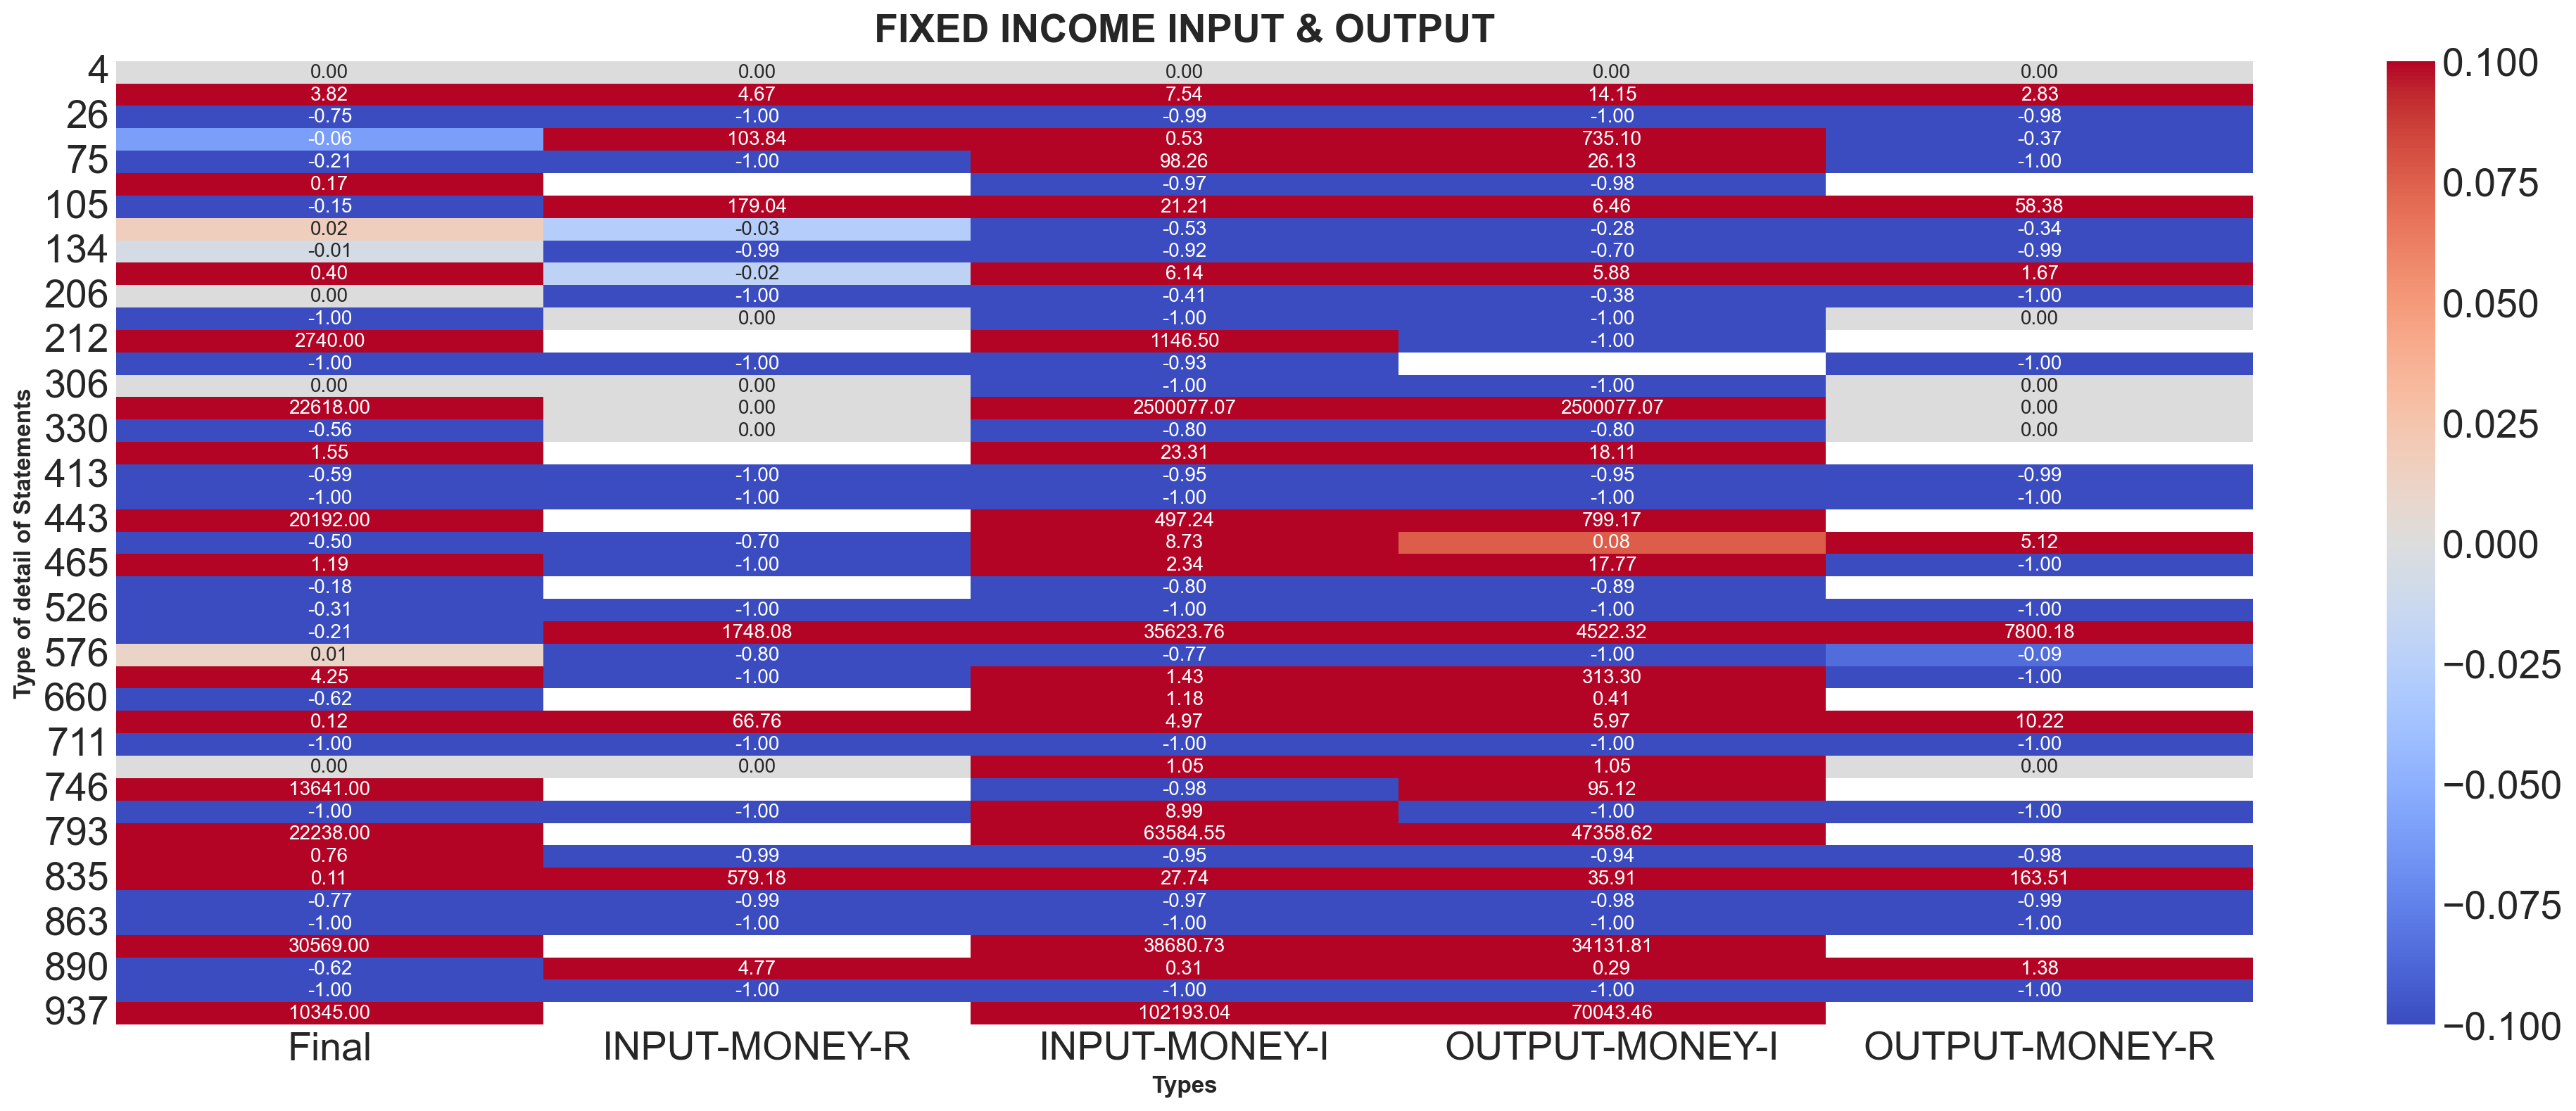

In [25]:
inputs = input_fix_funds_money.loc[:,["Final","INPUT-MONEY-R","INPUT-MONEY-I","OUTPUT-MONEY-I","OUTPUT-MONEY-R"]]
in_rets = inputs.pct_change().fillna(0.0)
float_columns = in_rets.select_dtypes(include=['float']).columns

# Create heatmap using only float columns
sns.heatmap(in_rets[float_columns].fillna(0), cmap='coolwarm', annot=True, fmt=".2f")

# Set the title and labels
plt.title('FIXED INCOME INPUT & OUTPUT')
plt.xlabel('Types')
plt.ylabel('Type of detail of Statements')

# Save and display the plot
save_fig('heatmap_input_fix_funds_money')
plt.show()


In [26]:
df1.columns

Index(['Ticker', 'Trade Type', 'Time', 'Open', 'High', 'Low', 'Close', 'Final',
       'Close(%)', 'Final(%)', 'Day_UL', 'Day_LL', 'Value', 'BQ-Value',
       'SQ-Value', 'BQPC', 'SQPC', 'Volume', 'Vol_Buy_R', 'Vol_Buy_I',
       'Vol_Sell_R', 'Vol_Sell_I', 'No', 'No_Buy_R', 'No_Buy_I', 'No_Sell_R',
       'No_Sell_I', 'Name', 'Market', 'Sector', 'Share-No', 'Base-Vol',
       'Market Cap', 'EPS', 'Download'],
      dtype='object')

In [27]:
total_or_block = df1[df1['Trade Type'].isin(['عمده', 'بلوکی'])]
did_not_block = df1[~df1['Trade Type'].isin(['بلوکی','عمده'])]
did_not_funds = did_not_block[~did_not_block['Market'].isin(['صندوق قابل معامله'])]
top_stock_volume = did_not_funds.sort_values(by='Volume', ascending=False)
market_value = (df1['Volume'] * df1['Close']).sum()
volumes=top_stock_volume.loc[:,['Volume','Ticker']][:20]
pd.set_option('display.max_rows',None)
volumes

,Volume,Ticker
922,2846765049,ذوب
545,501234968,خودرو
179,464353573,شستا
346,461881624,خساپا
610,294196911,وبملت
327,266123815,خگستر
265,257457657,کرمان
773,249788100,دی
713,237332242,خاور
548,220590452,فولاد


In [28]:
just_funds = did_not_block[did_not_block['Market'].isin(['صندوق قابل معامله'])]
top_funds_volume = just_funds.sort_values(by='Volume',ascending=False)
volumes1 = top_funds_volume.loc[:,['Volume','Ticker']][:20]
#volumes1
volumes1

,Volume,Ticker
105,263088452,کمند
8,261707633,کارا
823,224294041,اهرم
367,215095618,افران
684,181531599,یاقوت
724,175686712,لبخند
115,173231171,همای
632,156641377,شتاب
412,114686364,آوند
872,104646791,اتوآگاه


In [29]:
# Check for leading or trailing whitespaces
total_or_block['Market'] = total_or_block['Market'].str.strip()
did_not_block['Market'] = did_not_block['Market'].str.strip()
# Check for case sensitivity
bors_with_block = total_or_block[total_or_block['Market'].isin(['بورس'.upper(), 'بورس'.lower()])]
fara_bors_with_block = total_or_block[total_or_block['Market'].isin(['فرابورس'.upper(), 'فرابورس'.lower()])]

# Check for typographical errors
print(did_not_block['Market'].unique())  # Print unique values in 'Sector' column to double-check

# Check if the issue persists
bors_without_block = did_not_block[did_not_block['Market'].isin(['بورس'.upper(), 'بورس'.lower()])]
fara_bors_without_block = did_not_block[did_not_block['Market'].isin(['فرابورس'.upper(), 'فرابورس'.lower()])]


['فرابورس' 'بورس' 'صندوق قابل معامله' 'پایه' 'حق تقدم فرابورس'
 'حق تقدم بورس' 'حق تقدم پایه']


In [30]:
bors_with_block

,Ticker,Trade Type,Time,Open,High,Low,Close,Final,Close(%),Final(%),...,No_Sell_R,No_Sell_I,Name,Market,Sector,Share-No,Base-Vol,Market Cap,EPS,Download
41,رمپنا2,بلوکی,12:34:15,12260,12260,12260,12260,12260,-2.31,-2.31,...,0.0,1.0,گروه مپنا (سهامی عام),بورس,خدمات فنی و مهندسی,60000000000,1,735600000000000,1640.0,1403-01-18 15:48:08
55,فملی2,بلوکی,12:17:48,7050,7050,7050,7050,7050,0.71,0.71,...,0.0,2.0,ملی صنایع مس ایران,بورس,فلزات اساسی,780000000000,1,5499000000000000,849.0,1403-01-18 15:48:08
153,اسیاتک2,بلوکی,13:04:41,7280,7280,7280,7280,7280,-4.46,-4.46,...,0.0,1.0,انتقال داده های آسیاتک,بورس,اطلاعات و ارتباطات,4500000000,1,32760000000000,944.0,1403-01-18 15:48:08
211,داسوه2,بلوکی,11:06:29,38160,38160,38160,38160,38160,-1.98,-1.98,...,0.0,1.0,داروسازی اسوه,بورس,مواد و محصولات دارویی,750000000,1,28620000000000,3348.0,1403-01-18 15:48:08
262,شیراز2,بلوکی,9:59:04,26430,26430,26430,26430,26430,0.00,0.00,...,0.0,1.0,پتروشیمی شیراز,بورس,محصولات شیمیایی,15300000000,1,404379000000000,5019.0,1403-01-18 15:48:08
383,شپنا2,بلوکی,12:43:26,5860,5860,5800,5800,5859,-1.02,-0.02,...,0.0,3.0,پالایش نفت اصفهان,بورس,فراورده های نفتی، کک و سوخت هسته ای,371000000000,1,2173689000000000,1128.0,1403-01-18 15:48:08
435,خودرو2,بلوکی,11:00:48,3190,3190,3190,3190,3190,1.30,1.30,...,0.0,1.0,ایران خودرو,بورس,خودرو و ساخت قطعات,301656068000,1,962282856920000,-1401.0,1403-01-18 15:48:08
480,ومعادن2,بلوکی,12:25:18,3385,3385,3385,3385,3385,0.00,0.00,...,0.0,1.0,توسعه معادن وفلزات,بورس,استخراج کانه های فلزی,300000000000,1,1015500000000000,480.0,1403-01-18 15:48:08
537,وغدیر2,بلوکی,12:34:54,24940,24940,24940,24940,24940,-0.08,-0.08,...,0.0,1.0,سرمایه گذاری غدیر(هلدینگ,بورس,شرکتهای چند رشته ای صنعتی,72000000000,1,1795680000000000,3659.0,1403-01-18 15:48:08
555,شخارک2,بلوکی,12:17:54,49770,49770,49770,49770,49770,0.06,0.06,...,0.0,1.0,پتروشیمی خارک,بورس,محصولات شیمیایی,6000000000,1,298620000000000,6715.0,1403-01-18 15:48:08


In [31]:
bors_block_values = bors_with_block['Volume'] * bors_with_block['Close']
bors_without_block_values = bors_without_block['Volume'] * bors_without_block['Close']
farabors_block_values = fara_bors_with_block['Volume'] * fara_bors_with_block['Close']
farabors_without_block_values = fara_bors_without_block['Volume'] * fara_bors_without_block['Close']

In [32]:
total_bors_values = bors_without_block_values.sum()
total_bors_block_values = bors_block_values.sum()
total_farabors_values = farabors_without_block_values.sum()
total_farabors_block_values = farabors_block_values.sum()

In [33]:
df1.columns

Index(['Ticker', 'Trade Type', 'Time', 'Open', 'High', 'Low', 'Close', 'Final',
       'Close(%)', 'Final(%)', 'Day_UL', 'Day_LL', 'Value', 'BQ-Value',
       'SQ-Value', 'BQPC', 'SQPC', 'Volume', 'Vol_Buy_R', 'Vol_Buy_I',
       'Vol_Sell_R', 'Vol_Sell_I', 'No', 'No_Buy_R', 'No_Buy_I', 'No_Sell_R',
       'No_Sell_I', 'Name', 'Market', 'Sector', 'Share-No', 'Base-Vol',
       'Market Cap', 'EPS', 'Download'],
      dtype='object')

In [34]:
total_real_buyer = (df1['Vol_Buy_R'] * df1['Close']).sum()
total_real_seller = (df1['Vol_Sell_R'] *df1['Close']).sum()
total_ind_buyer = (df1['Vol_Buy_I'] * df1['Close']).sum()
total_ind_seller = (df1['Vol_Sell_I']*df1['Close']).sum()

In [35]:
total_input_money = total_real_buyer + total_ind_seller
total_output_money = total_real_seller + total_ind_seller

In [36]:
total_input_sum_real = input_fix_funds_money['INPUT-MONEY-I'].sum()
total_input_sum_ind = input_fix_funds_money['INPUT-MONEY-R'].sum()


# Calculate the total sum of OUTPUT-MONEY
total_output_sum_real = input_fix_funds_money['OUTPUT-MONEY-I'].sum()
total_output_sum_ind = input_fix_funds_money['OUTPUT-MONEY-R'].sum()


In [37]:
total_input_money

135239424873921.0

In [38]:
total_values_dict = {'Total Values of TEPIX':market_value,
                     'Total Values of just Bours(without Block)':total_bors_values,
                     'Total Values of Bours with Block Trading ':total_bors_block_values,
                     "Total Values of just FaraBours(without Block)":total_farabors_values,
                     "Total Values of FaraBours with Block":total_farabors_block_values,
                     "Total Values of just Buy by Real Trader":total_real_buyer,
                     "Total Values of just Sell by Real Traddr":total_real_seller,
                     "Total Values of Buy by Company Investors":total_ind_buyer,
                     "Total Values of Sell by Company Investor":total_ind_seller,
                     "Input Smart Money to Market":total_input_money,
                     "Output Smart Money of Market":total_output_money,
                     "Total Input Money by Real Trader to Fixed Income Funds":total_input_sum_real,
                     "Total Output Money by Real Trader to Fixed Income Funds":total_output_sum_real,
                     "Total Input Money by Company Investors to Fixed Income Funds":total_input_sum_ind,
                     "Total Output Money by Company Investors to Fixed Income Funds":total_output_sum_ind,
                     }

In [39]:
total_values_df = pd.DataFrame.from_dict(total_values_dict, orient='index', columns=['Result'])
total_values_df.index.name = 'Type'

In [40]:
total_values_df

,Result
Type,
Total Values of TEPIX,1.541089e+14
Total Values of just Bours(without Block),3.527328e+13
Total Values of Bours with Block Trading,1.809370e+13
Total Values of just FaraBours(without Block),1.322590e+13
Total Values of FaraBours with Block,8.581123e+10
Total Values of just Buy by Real Trader,6.613494e+13
Total Values of just Sell by Real Traddr,8.500437e+13
Total Values of Buy by Company Investors,8.797391e+13
Total Values of Sell by Company Investor,6.910448e+13


In [41]:
import os

# Define the directory path
directory_path = r'D:\Optics_Slope\Excels_File_Periods\Output'

# Get a list of all files in the directory
file_list = os.listdir(directory_path)

# Iterate through the files and remove Excel files that contain "Market" or "Order" in their names
for file_name in file_list:
    if file_name.endswith('.xlsx') and ('Market' in file_name or 'Order' in file_name):
        file_path = os.path.join(directory_path, file_name)
        try:
            os.remove(file_path)
            print(f"Removed file: {file_path}")
        except Exception as e:
            print(f"Error removing {file_path}: {e}")

print("Process completed.")

Removed file: D:\Optics_Slope\Excels_File_Periods\Output\MarketWatch 1403-01-18 15-48-08.xlsx
Removed file: D:\Optics_Slope\Excels_File_Periods\Output\OrderBook 1403-01-18 15-48-08.xlsx
Process completed.


In [42]:
save_data(total_values_df,'total_values_df')

Saving Excel file: D:\Optics_Slope\Excels_File_Periods\Output\total_values_df_4.xlsx


In [43]:
PROJECT_ROOT_DIR = "D:\Optics_Slope"
CHAPTER_ID = "Output"
FILES_PATH = os.path.join(PROJECT_ROOT_DIR, "Excels_File_Periods", CHAPTER_ID)

def read_excel_files_sorted(directory):
    excel_files = [f for f in os.listdir(directory) if f.endswith('.xlsx')]
    excel_files.sort(key=lambda x: os.path.getmtime(os.path.join(directory, x)), reverse=True)
    first_df_read = False
    first_column = None
    suffix_counter = 0
    for file in excel_files:
        file_path = os.path.join(directory, file)
        df = pd.read_excel(file_path)
        if not first_df_read:
            # Save the first column of the first DataFrame
            first_column = df.iloc[:, 0]
            first_df_read = True
        else:
            # Add suffix to each column name for this DataFrame
            suffix_counter += 1
            suffix = f"_{suffix_counter}"
            df.columns = df.columns.to_series().apply(lambda x: f"{x}{suffix}")
            first_column = pd.concat([first_column, df.iloc[:, 1:]], axis=1)
    return first_column

# Example usage:
sorted_total_values_df = read_excel_files_sorted(FILES_PATH)
sorted_total_values_df = sorted_total_values_df.set_index('Type')
sorted_total_values_df

,Result_1,Result_2,Result_3
Type,,,
Total Values of TEPIX,154108852396286,154108852396286,154108852396286
Total Values of just Bours(without Block),35273283369773,35273283369773,35273283369773
Total Values of Bours with Block Trading,18093695461821,18093695461821,18093695461821
Total Values of just FaraBours(without Block),13225904720684,13225904720684,13225904720684
Total Values of FaraBours with Block,85811227300,85811227300,85811227300
Total Values of just Buy by Real Trader,66134944937774,66134944937774,66134944937774
Total Values of just Sell by Real Traddr,85004372460139,85004372460139,85004372460139
Total Values of Buy by Company Investors,87973907458512,87973907458512,87973907458512
Total Values of Sell by Company Investor,69104479936147,69104479936147,69104479936147


In [44]:
beta_slopes = []

# Iterate over each row in the DataFrame
for index, row in sorted_total_values_df.iterrows():
    # Calculate the x values (column indices) and y values (row values)
    x = np.arange(1, len(row) + 1)
    y = row.values
    
    # Calculate the covariance between x and y
    cov_xy = np.cov(x, y)[0, 1]
    
    # Calculate the variance of x
    var_x = np.var(x)
    
    # Calculate the slope beta
    slope = cov_xy / var_x
    
    # Convert the slope value to float and append it to the list
    beta_slopes.append(float(slope))
sorted_total_values_df['Beta_slope'] = beta_slopes

# Convert the entire list of slopes to float
sorted_total_values_df['Beta_slope'] = sorted_total_values_df['Beta_slope'].apply(lambda x: float(x))

# Display the DataFrame
sorted_total_values_df

,Result_1,Result_2,Result_3,Beta_slope
Type,,,,
Total Values of TEPIX,154108852396286,154108852396286,154108852396286,0.0
Total Values of just Bours(without Block),35273283369773,35273283369773,35273283369773,0.0
Total Values of Bours with Block Trading,18093695461821,18093695461821,18093695461821,0.0
Total Values of just FaraBours(without Block),13225904720684,13225904720684,13225904720684,0.0
Total Values of FaraBours with Block,85811227300,85811227300,85811227300,0.0
Total Values of just Buy by Real Trader,66134944937774,66134944937774,66134944937774,0.0
Total Values of just Sell by Real Traddr,85004372460139,85004372460139,85004372460139,0.0
Total Values of Buy by Company Investors,87973907458512,87973907458512,87973907458512,0.0
Total Values of Sell by Company Investor,69104479936147,69104479936147,69104479936147,0.0


In [45]:
sorted_total_values_df['Beta_slope'] = pd.to_numeric(sorted_total_values_df['Beta_slope'], errors='coerce')

# Calculate the slope for each row
row_slopes = []
for index, row in sorted_total_values_df.iterrows():
    x = np.arange(1, len(row) + 1)
    y = row.values
    cov_xy = np.cov(x, y)[0, 1]
    var_x = np.var(x)
    slope = float(cov_xy / var_x)
    row_slopes.append(slope)

# Get the Beta_slope values as a numpy array
beta_slopes = sorted_total_values_df['Beta_slope'].values

# Compare each row's slope with the Beta_slope values
warning_messages = []
for row_slope, beta_slope in zip(row_slopes, beta_slopes):
    if np.isnan(beta_slope):  # Check if Beta_slope value is NaN
        warning_messages.append("هشدار : شیب غیر عددی حاصل شده است")
    elif row_slope > beta_slope:
        warning_messages.append("هشدار : تغییر معنادار دیفرانسیل حجم معاملات ")
    else:
        warning_messages.append("عدم تغییر معنادار دیفرانسیل حجم معاملات ")

# Add warning messages to the DataFrame
sorted_total_values_df['Warning'] = warning_messages

# Display the DataFrame
sorted_total_values_df

,Result_1,Result_2,Result_3,Beta_slope,Warning
Type,,,,,
Total Values of TEPIX,154108852396286,154108852396286,154108852396286,0.0,عدم تغییر معنادار دیفرانسیل حجم معاملات
Total Values of just Bours(without Block),35273283369773,35273283369773,35273283369773,0.0,عدم تغییر معنادار دیفرانسیل حجم معاملات
Total Values of Bours with Block Trading,18093695461821,18093695461821,18093695461821,0.0,عدم تغییر معنادار دیفرانسیل حجم معاملات
Total Values of just FaraBours(without Block),13225904720684,13225904720684,13225904720684,0.0,عدم تغییر معنادار دیفرانسیل حجم معاملات
Total Values of FaraBours with Block,85811227300,85811227300,85811227300,0.0,عدم تغییر معنادار دیفرانسیل حجم معاملات
Total Values of just Buy by Real Trader,66134944937774,66134944937774,66134944937774,0.0,عدم تغییر معنادار دیفرانسیل حجم معاملات
Total Values of just Sell by Real Traddr,85004372460139,85004372460139,85004372460139,0.0,عدم تغییر معنادار دیفرانسیل حجم معاملات
Total Values of Buy by Company Investors,87973907458512,87973907458512,87973907458512,0.0,عدم تغییر معنادار دیفرانسیل حجم معاملات
Total Values of Sell by Company Investor,69104479936147,69104479936147,69104479936147,0.0,عدم تغییر معنادار دیفرانسیل حجم معاملات


In [46]:
save_data_1(sorted_total_values_df,'sorted_total_values_df')

Saving Excel file: D:\Optics_total\Excels_File_Periods\total_data\sorted_total_values_df_4.xlsx


In [47]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Filter rows with significant change in statistics
significant_change_df = sorted_total_values_df[sorted_total_values_df['Warning'] == "هشدار : تغییر معنادار دیفرانسیل حجم معاملات"]

# Check if there are rows meeting the condition
if not significant_change_df.empty:
    # Email configuration
    sender_email = "moslem.ali.agah@gmail.com"
    password = "aqeq ptgx cvrn styz"
    receiver_email = "moslem.alikarami@gmail.com"
    subject = "هشدار درباره افزایش شتاب معاملات"
    body = "لطفا توجه داشته باشید که برخی از آمارها نشان دهنده افزایش شتاب معاملات می‌باشند."

    # Create message container
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject

    # Attach body to email
    msg.attach(MIMEText(body, 'plain'))

    # Attach DataFrame as CSV file
    attachment = MIMEText(significant_change_df.to_csv(), 'csv')
    attachment.add_header('Content-Disposition', 'attachment', filename="significant_change_data.csv")
    msg.attach(attachment)

    # Send email
    with smtplib.SMTP('smtp.gmail.com', 587) as server:
        server.starttls()
        server.login(sender_email, password)
        server.send_message(msg)
        
    print("Email sent successfully.")
else:
    print("No significant changes in statistics to report and email didn't sent.")


No significant changes in statistics to report and email didn't sent.


# in end of market should clean all temporary data 